In [1]:
import numpy as np
import requests
from typing import List, Dict, Any

from stock_indicators.indicators.common.quote import Quote
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import csv

In [6]:
class StockResponse:
    stock_data: List[Quote]

    def __init__(self, stock_data: List[Quote]):
        self.stock_data = stock_data

    @classmethod
    def from_json(cls, data: Dict[str, Any]) -> 'StockResponse':
        result = data["chart"]["result"][0]
        timestamps = result["timestamp"]
        indicators = result["indicators"]["quote"][0]

        stock_data: List[Quote] = []
        for i in range(len(timestamps)):
            date = datetime.fromtimestamp(timestamps[i])
            open_price = indicators["open"][i]
            high = indicators["high"][i]
            low = indicators["low"][i]
            close = indicators["close"][i]
            volume = indicators["volume"][i]

            # Skip if any value is None
            if 0 in (open_price, high, low, close, volume):
                continue

            stock_data.append(Quote(date, open_price, high, low, close, volume))

        return cls(stock_data=stock_data)


    @classmethod
    def from_csv(cls, file_path: str) -> 'StockResponse':
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Ensure the required columns are present
        required_columns = ['date', 'open', 'high', 'low', 'close', 'volume']
        if not all(col in df.columns for col in required_columns):
            raise ValueError(f"CSV file must contain the following columns: {required_columns}")

        # Parse the data into Quote objects
        stock_data: List[Quote] = []
        for _, row in df.iterrows():
            date = datetime.strptime(row['date'], '%Y-%m-%d')  # Adjust format if needed
            open_price = row['open']
            high = row['high']
            low = row['low']
            close = row['close']
            volume = row['volume']

            # Skip if any value is None or invalid
            if 0 in (open_price, high, low, close, volume):
                continue

            stock_data.append(Quote(date, open_price, high, low, close, volume))

        return cls(stock_data=stock_data)


    def to_dataframe(self) -> pd.DataFrame:
        data = [[
            stock.date,
            stock.open,
            stock.high,
            stock.low,
            stock.close,
            stock.volume
        ] for stock in self.stock_data]
        return pd.DataFrame(data, columns=['date', 'open', 'high', 'low', 'close', 'volume'])

    def to_numpy(self) -> np.ndarray:
        data = [[
            stock.date,
            stock.open,
            stock.high,
            stock.low,
            stock.close,
            stock.volume
        ] for stock in self.stock_data]
        return np.array(data)

In [3]:
def compute_and_add_indicators(stock_data: List, df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute technical indicators and add them to the DataFrame.

    Parameters:
    - stock_data (List): List of Quote objects containing stock data.
    - df (pd.DataFrame): DataFrame containing stock data.

    Returns:
    - pd.DataFrame: Updated DataFrame with technical indicators.
    """
    # Compute Technical Indicators
    sma = indicators.get_sma(stock_data, 14)
    rsi = indicators.get_rsi(stock_data, 14)
    macd = indicators.get_macd(stock_data)
    bollinger = indicators.get_bollinger_bands(stock_data, 20)
    atr = indicators.get_atr(stock_data, 14)
    wma = indicators.get_wma(stock_data, 14)
    tr = indicators.get_tr(stock_data)
    stoch_oscillator = indicators.get_stoch(stock_data)
    william = indicators.get_williams_r(stock_data)
    ema = indicators.get_ema(stock_data, 14)
    obv = indicators.get_obv(stock_data)
    ichimoku = indicators.get_ichimoku(stock_data)
    vwap = indicators.get_vwap(stock_data)
    smi = indicators.get_smi(stock_data)
    dema = indicators.get_dema(stock_data, 14)
    mfi = indicators.get_mfi(stock_data)
    cci = indicators.get_cci(stock_data)
    cmo = indicators.get_cmo(stock_data, 14)

    # Add indicators to the DataFrame
    for i in range(len(df)):
        df.loc[i, 'SMA'] = sma[i].sma
        df.loc[i, 'RSI'] = rsi[i].rsi
        df.loc[i, 'MACD'] = macd[i].macd
        df.loc[i, 'bollinger_upper'] = bollinger[i].upper_band
        df.loc[i, 'bollinger_lower'] = bollinger[i].lower_band
        df.loc[i, 'ATR'] = atr[i].atr
        df.loc[i, 'WMA'] = wma[i].wma
        df.loc[i, 'TR'] = tr[i].tr
        df.loc[i, '%K'] = stoch_oscillator[i].k
        df.loc[i, '%D'] = stoch_oscillator[i].d
        df.loc[i, '%R'] = william[i].williams_r
        df.loc[i, 'EMA'] = ema[i].ema
        df.loc[i, 'OBV'] = obv[i].obv
        df.loc[i, 'Ichimoku'] = ichimoku[i].kijun_sen
        df.loc[i, 'VWAP'] = vwap[i].vwap
        df.loc[i, 'SMI'] = smi[i].smi
        df.loc[i, 'DEMA'] = dema[i].dema
        df.loc[i, 'MFI'] = mfi[i].mfi
        df.loc[i, 'CCI'] = cci[i].cci
        df.loc[i, 'CMO'] = cmo[i].cmo

    # Handle missing values or NaNs
    df = df.dropna()

    # Convert columns to appropriate data types
    df = df.astype({
        'close': 'float64',
        'SMA': 'float64',
        'RSI': 'float64',
        'MACD': 'float64',
        'bollinger_upper': 'float64',
        'bollinger_lower': 'float64',
        'ATR': 'float64',
        'WMA': 'float64',
        'TR': 'float64',
        '%K': 'float64',
        '%D': 'float64',
        '%R': 'float64',
        'EMA': 'float64',
        'OBV': 'float64',
        'Ichimoku': 'float64',
        'VWAP': 'float64',
        'SMI': 'float64',
        'DEMA': 'float64',
        'MFI': 'float64',
        'CCI': 'float64',
        'CMO': 'float64'
    })

    # Verify data types (optional, can be disabled to save computation)
    # print(df.dtypes)

    return df

In [4]:
from pytz import timezone
from datetime import datetime

def convert_to_unix_timestamp(date_str: str) -> int:
    jakarta_tz = timezone("Asia/Jakarta")
    current_time = datetime.now(jakarta_tz)
    date_with_time = datetime.strptime(date_str, "%Y-%m-%d").replace(
        hour=current_time.hour,
        minute=current_time.minute,
        second=current_time.second,
        tzinfo=jakarta_tz
    )
    return int(date_with_time.timestamp())


# Checkpoint to restart from

In [7]:
stock_response = StockResponse.from_csv('csv/aapl_2014_2023.csv')
df   = stock_response.to_dataframe()
df

,date,open,high,low,close,volume
0,2014-01-02,19.845715,19.893929,19.715,19.754642,234684800
1,2014-01-03,19.745001,19.775,19.301071,19.320715,392467600
2,2014-01-06,19.194643,19.52857,19.057142,19.426071,412610800
3,2014-01-07,19.440001,19.498571,19.21143,19.287144,317209200
4,2014-01-08,19.243214,19.484285,19.23893,19.409286,258529600
...,...,...,...,...,...,...
2511,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800
2512,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300
2513,2023-12-27,192.490005,193.5,191.089996,193.149994,48087700
2514,2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900


In [8]:
# init variable for dataset to be used
# remove all column except for date and move the close price to y
df = stock_response.to_dataframe()
df = df.drop(columns=['open', 'high', 'low', 'volume'])

# Add column for the next day close price
df['next_day_price_move'] = df['close'].shift(-1)

# Drop the last row as it will have NaN in 'next_day_price_move'
df = df.drop(df.index[-1])

# Create the label with 3 classes
df['next_day_price_move'] = np.where(df['close'] < df['next_day_price_move'], 2,
                                     np.where(df['close'] == df['next_day_price_move'], 1, 0))

# Ensure there are no invalid labels
assert df['next_day_price_move'].isin([0, 1, 2]).all(), "Invalid label found"

df

,date,close,next_day_price_move
0,2014-01-02,19.754642,0
1,2014-01-03,19.320715,2
2,2014-01-06,19.426071,0
3,2014-01-07,19.287144,2
4,2014-01-08,19.409286,0
...,...,...,...
2510,2023-12-21,194.679993,0
2511,2023-12-22,193.600006,0
2512,2023-12-26,193.050003,2
2513,2023-12-27,193.149994,2


# Define the Technical Indicators

In [9]:
from stock_indicators import indicators
stock_data = stock_response.stock_data # Holds the data in Quote object to be used for indicators
df = compute_and_add_indicators(stock_data, df)

print(df.dtypes)
df

date                   datetime64[ns]
close                         float64
next_day_price_move             int32
SMA                           float64
RSI                           float64
MACD                          float64
bollinger_upper               float64
bollinger_lower               float64
ATR                           float64
WMA                           float64
TR                            float64
%K                            float64
%D                            float64
%R                            float64
EMA                           float64
OBV                           float64
Ichimoku                      float64
VWAP                          float64
SMI                           float64
DEMA                          float64
MFI                           float64
CCI                           float64
CMO                           float64
dtype: object


,date,close,next_day_price_move,SMA,RSI,MACD,bollinger_upper,bollinger_lower,ATR,WMA,...,%R,EMA,OBV,Ichimoku,VWAP,SMI,DEMA,MFI,CCI,CMO
25,2014-02-07,18.559999,2,18.663418,43.462629,-0.516675,20.422417,17.375440,0.399827,18.369564,...,-59.005354,18.551948,4.982572e+08,18.816964,18.902443,-31.424291,18.171684,49.090712,-30.383449,-20.817269
26,2014-02-10,18.892500,2,18.612194,48.981848,-0.446799,20.414110,17.369640,0.406956,18.400108,...,-44.399101,18.597355,8.438164e+08,18.816964,18.899095,-28.288935,18.307146,49.125547,-7.877921,-19.736634
27,2014-02-11,19.141430,0,18.572525,52.704328,-0.367103,20.414786,17.369786,0.400235,18.470673,...,-32.628997,18.669898,1.126073e+09,18.816964,18.903832,-23.163134,18.481254,48.228879,19.643735,-14.632544
28,2014-02-12,19.139999,2,18.520842,52.680532,-0.300594,20.374120,17.373058,0.387769,18.546336,...,-31.738382,18.732579,8.179724e+08,18.816964,18.910502,-17.793862,18.623410,47.322751,27.602890,-19.933102
29,2014-02-13,19.443930,0,18.516658,57.109845,-0.220815,20.300142,17.400858,0.387240,18.669415,...,-16.930514,18.827425,1.125370e+09,18.816964,18.921408,-10.127774,18.815013,53.507030,49.090825,-1.639330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2023-12-21,194.679993,0,194.930001,57.752983,2.963181,199.386522,187.587479,2.817583,195.711049,...,-40.591642,194.577363,7.779578e+09,193.534996,60.720126,54.383532,197.109765,53.169633,45.957856,14.776553
2511,2023-12-22,193.600006,0,195.227860,54.609714,2.636317,199.343118,187.993883,2.790613,195.533716,...,-63.771056,194.447049,7.742455e+09,193.534996,60.734521,49.607115,196.528858,53.500840,12.941078,18.492282
2512,2023-12-26,193.050003,2,195.201431,53.026883,2.306308,199.231774,188.431228,2.666998,195.243335,...,-80.121883,194.260776,7.713535e+09,193.534996,60.745670,43.942636,195.903574,47.643933,-13.451176,-1.936131
2513,2023-12-27,193.149994,2,195.260716,53.291938,2.029448,199.148303,188.789699,2.648641,194.969810,...,-75.849962,194.112672,7.761623e+09,193.534996,60.764112,38.313360,195.408073,42.092570,-39.432219,4.583027


# Feature Selection with Recursive Feature Elimination (RFE)

In [11]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target
X = df.loc[:, (df.columns != 'next_day_price_move') & (df.columns != 'date') & (df.columns != 'close')]
y = df['next_day_price_move']  # 0 = down, 1 = neutral, 2 = up

# Use a classifier suitable for multiclass
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Select top N features (e.g., 5)
selector = RFE(estimator=model, n_features_to_select=5)
selector = selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.support_]
# dummy selected_features if I want to try all the features
# selected_features = X.columns
# selected_features = ["MACD", "ATR", "RSI", "MFI", "DEMA"]
# selected_features = ["MACD", "ATR", "RSI", "MFI", "DEMA", "VWAP", "CCI"]
print("Selected features:", selected_features)

# Filter dataset with selected features
X = df[selected_features]


# Optianlly, using RFECV
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold
#
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# cv = StratifiedKFold(n_splits=5)
#
# rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')
# rfecv.fit(X, y)
#
# selected_features = X.columns[rfecv.support_]
# print("Optimal number of features:", rfecv.n_features_)
# print("Selected features:", selected_features.tolist())
#
# X = df[selected_features]

# save the selected feature
with open('selected_features_aapl.txt', 'w') as f:
    for feature in selected_features:
        f.write(f'{feature}\n')

Selected features: Index(['RSI', 'MACD', '%K', 'OBV', 'CCI'], dtype='object')


# Visualize the selected features

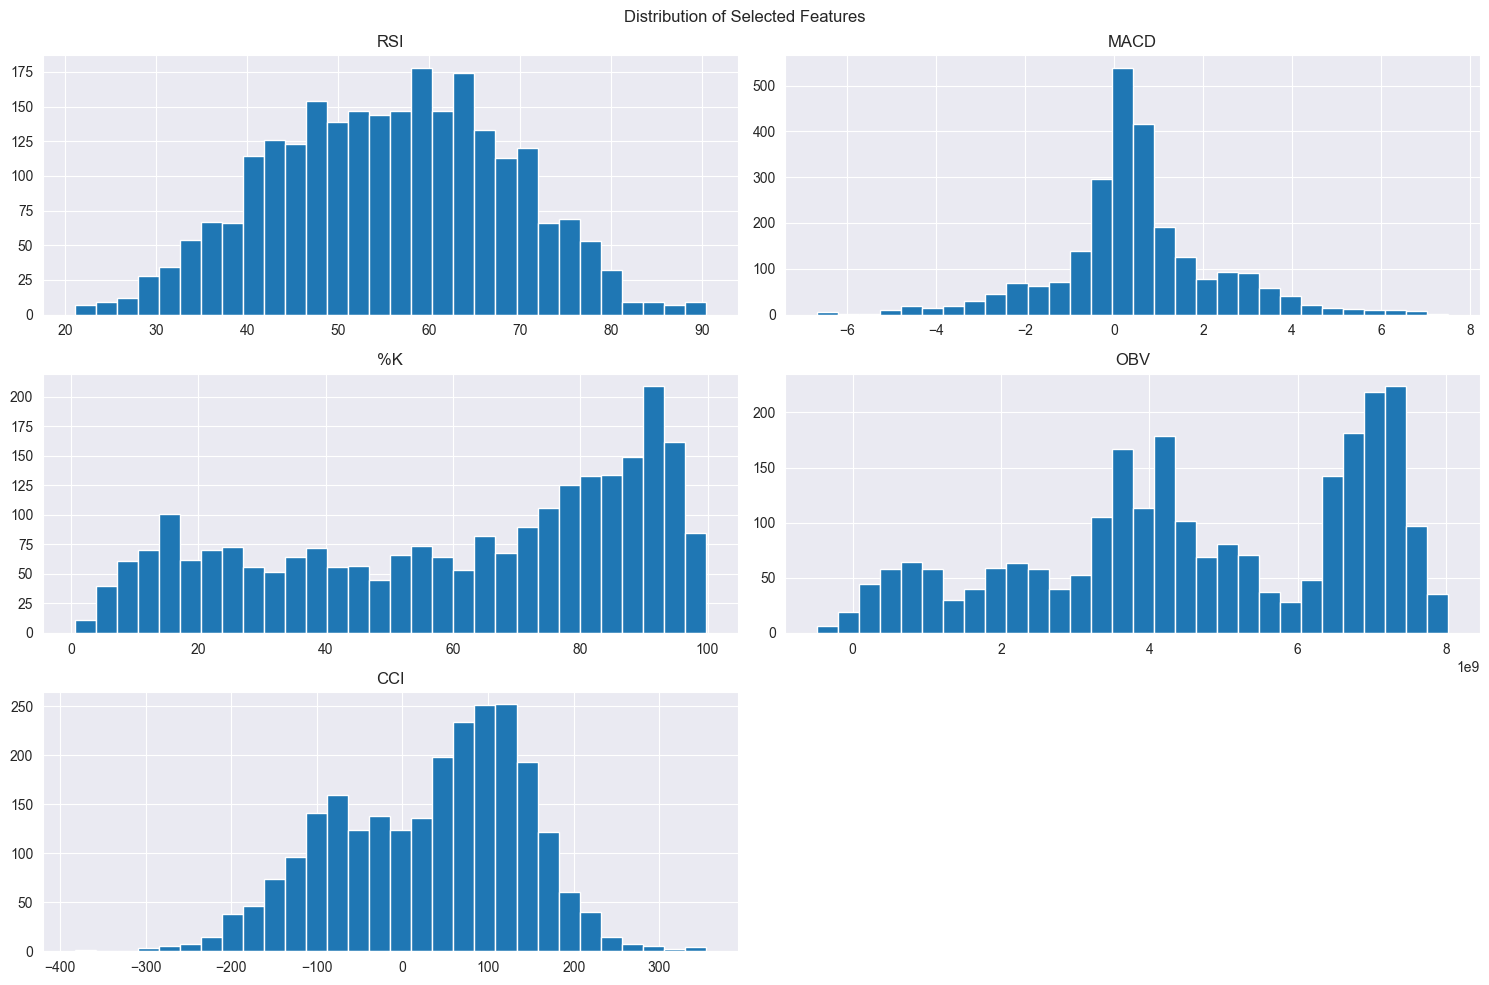

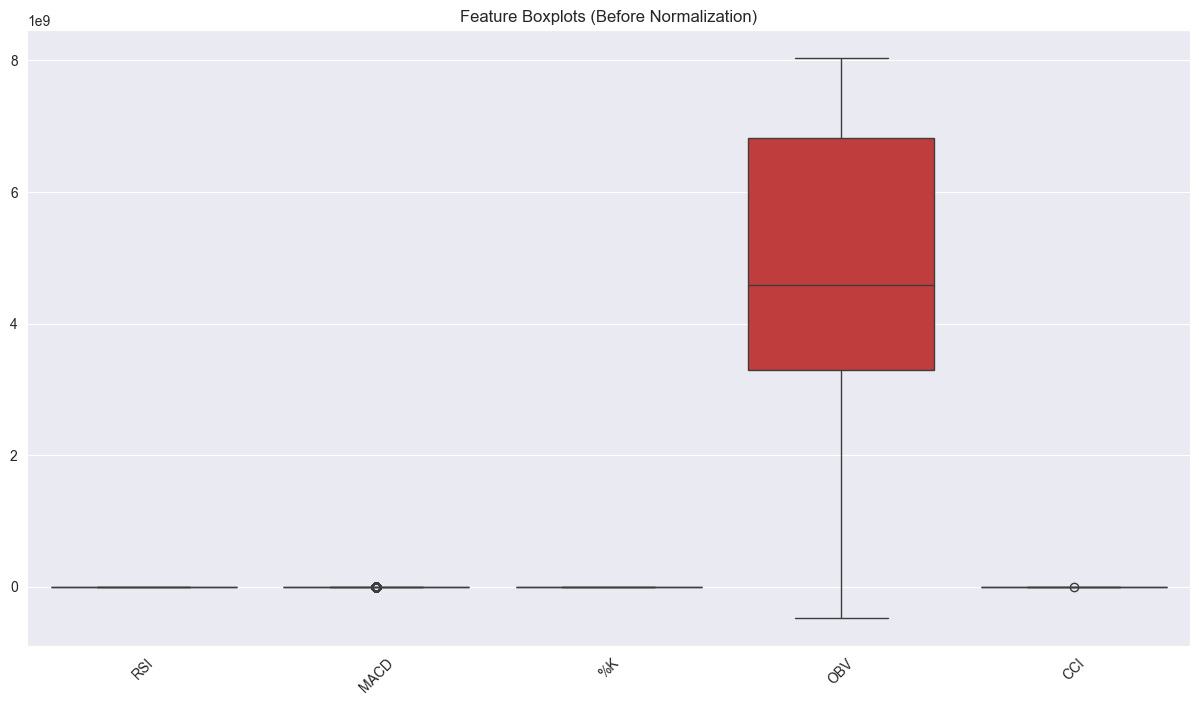

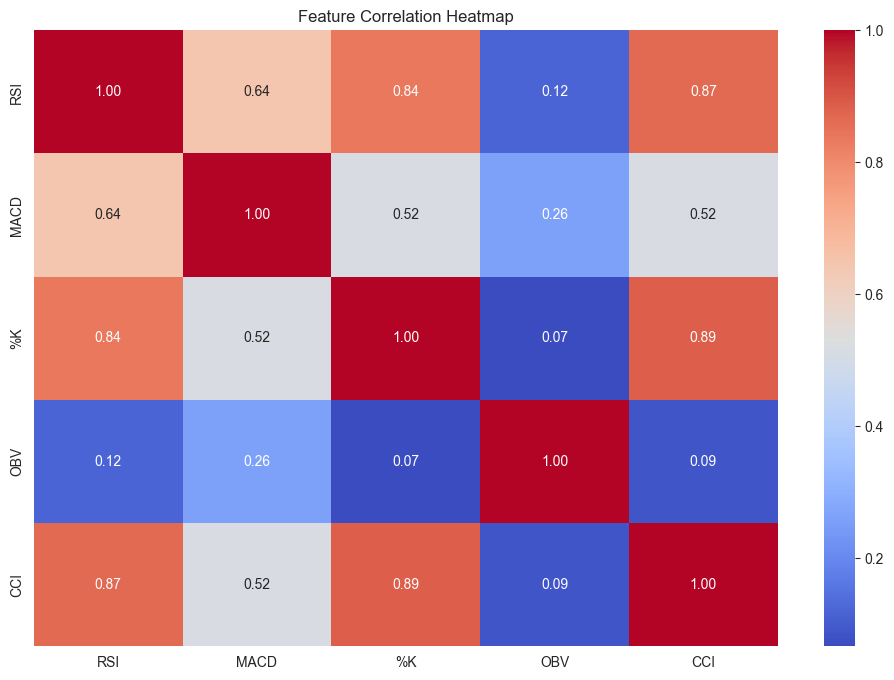

In [12]:
X.hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribution of Selected Features')
plt.tight_layout()
plt.show()

# Boxplot for feature distributions before normalization
plt.figure(figsize=(15, 8))
sns.boxplot(data=X)
plt.title('Feature Boxplots (Before Normalization)')
plt.xticks(rotation=45)
plt.show()

# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Prepare the Data for Training and Testing

In [13]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Exclude the 'date' and 'next_day_price_move' columns before normalization
df_features = df[selected_features]
df_normalized = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Add the 'date' column back to the normalized DataFrame
df_normalized.insert(0, 'date', df['date'].values)

# Move 'next_day_price_move' to the last column
df_normalized['next_day_price_move'] = df['next_day_price_move'].values


print(df_normalized.head())

        date       RSI      MACD        %K       OBV       CCI  \
0 2014-02-07 -0.942225 -0.546154 -0.930974 -1.894162 -0.567503   
1 2014-02-10 -0.514746 -0.507936 -0.631969 -1.737761 -0.362476   
2 2014-02-11 -0.226430 -0.464348 -0.194725 -1.610011 -0.111752   
3 2014-02-12 -0.228273 -0.427972  0.122146 -1.749458 -0.039243   
4 2014-02-13  0.114790 -0.384338  0.441360 -1.610330  0.156514   

   next_day_price_move  
0                    2  
1                    2  
2                    0  
3                    2  
4                    0  


In [296]:
df_normalized.dtypes # just checking the dtypes

date                   datetime64[ns]
MACD                          float64
ATR                           float64
%K                            float64
MFI                           float64
CCI                           float64
next_day_price_move             int32
dtype: object

In [75]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def create_sliding_window(data, window_size):
    """
    Create sliding window data for time series.

    Parameters:
    - data (np.ndarray): The input data as a NumPy array.
    - window_size (int): The size of the sliding window.

    Returns:
    - X (np.ndarray): The feature windows.
    - y (np.ndarray): The target values.
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        # Extract a window of features
        X.append(data[i:i + window_size, :-1])  # All features except the target
        # Extract the target value corresponding to the end of the window
        y.append(data[i + window_size, -1])    # The target is the last column
    return np.array(X), np.array(y)

window_size = 20  # Define the size of the sliding window

# Convert the DataFrame to a NumPy array
data = df_normalized.drop(columns=['date']).values

# Create the sliding window data
X, y = create_sliding_window(data, window_size)

# Split the data into training and testing sets
# split_ratio = 0.9
# split_index = int(len(X) * split_ratio)
train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.1)

# X_train, X_test = X[:split_index], X[split_index:]
# y_train, y_test = y[:split_index], y[split_index:]
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1976, 20, 5), y_train shape: (1976,)
X_test shape: (247, 20, 5), y_test shape: (247,)


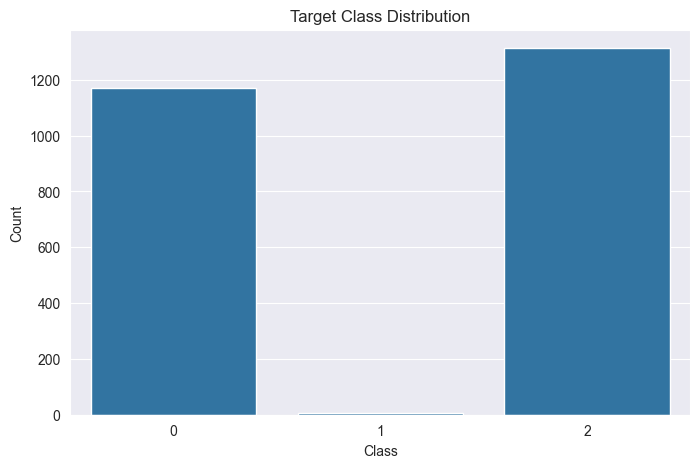

Class Distribution:
next_day_price_move
2    0.527711
0    0.469880
1    0.002410
Name: proportion, dtype: float64


In [76]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=df_normalized['next_day_price_move'])
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# print the class distribution
class_distribution = df_normalized['next_day_price_move'].value_counts(normalize=True)
print("Class Distribution:")
print(class_distribution)

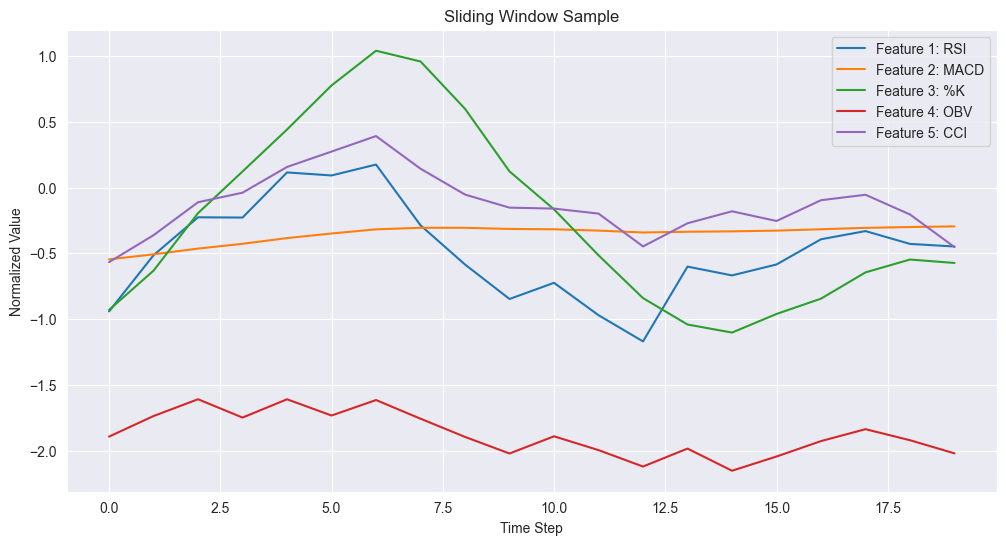

In [77]:
# Visualize a sample sliding window
sample_index = 0  # Change this to visualize different samples
sample_window = X_train[sample_index]

plt.figure(figsize=(12, 6))
for i in range(sample_window.shape[1]):
    plt.plot(sample_window[:, i], label=f'Feature {i+1}: {selected_features[i]}')
plt.title('Sliding Window Sample')
plt.xlabel('Time Step')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

# Visualize the selected features after normalization

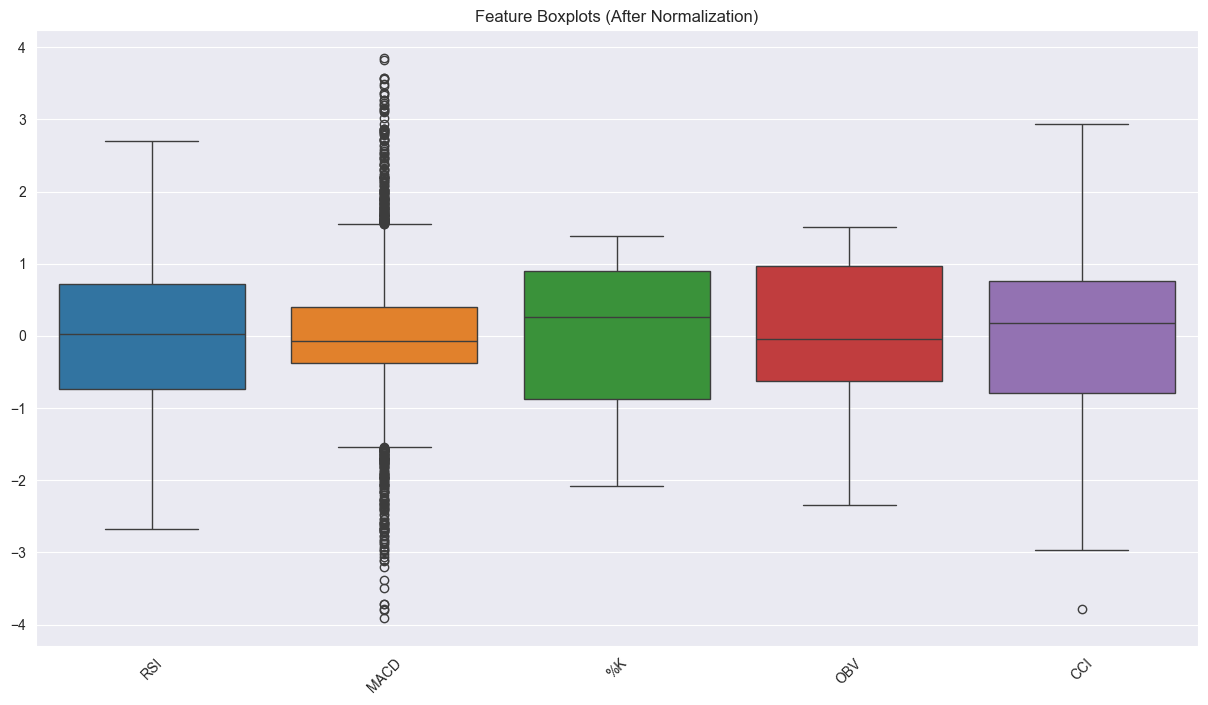

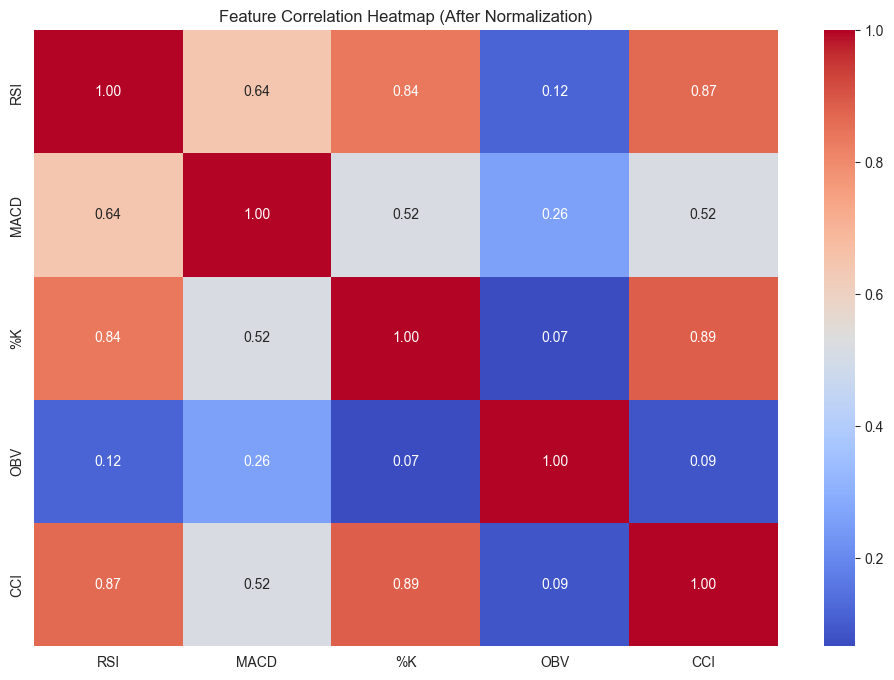

In [78]:
# Boxplot for feature distributions after normalization
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_normalized[selected_features])
plt.title('Feature Boxplots (After Normalization)')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap after normalization
plt.figure(figsize=(12, 8))
sns.heatmap(df_normalized[selected_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap (After Normalization)')
plt.show()


# Train and Evaluate the Model with LSTM

In [79]:
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback
import numpy as np
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import f1_score

# Early stop
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Reduce learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=1e-6
)

# Save best model
model_checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Add F1 Score callback (as before)
class F1ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(F1ScoreCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        # Ensure the validation data is set properly
        X_val, y_val = self.validation_data

        # Predict on validation set
        y_pred = self.model.predict(X_val)
        y_true = y_val

        # Calculate predicted classes
        y_pred_classes = tf.argmax(y_pred, axis=1)

        # Calculate and log F1 score
        precision = tf.keras.metrics.Precision()
        recall = tf.keras.metrics.Recall()

        precision.update_state(y_true, y_pred_classes)
        recall.update_state(y_true, y_pred_classes)

        precision_score = precision.result().numpy()
        recall_score = recall.result().numpy()
        f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score + 1e-7)

        print(f" - val_f1_score: {f1_score:.4f}")

        # Add the F1 score to logs for TensorBoard or other callbacks
        logs['val_f1_score'] = f1_score


f1_callback = F1ScoreCallback(validation_data=(X_val, y_val))


def macro_f1(y_true, y_pred):
    y_pred = K.argmax(y_pred, axis=-1)
    y_true = K.cast(y_true, 'int64')

    # Confusion matrix values
    cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=3)
    diag = tf.cast(tf.linalg.diag_part(cm), tf.float32)

    # Cast tf.reduce_sum(cm, axis=0) to float32
    precision = diag / (tf.cast(tf.reduce_sum(cm, axis=0), tf.float32) + K.epsilon())
    recall = diag / (tf.cast(tf.reduce_sum(cm, axis=1), tf.float32) + K.epsilon())  # Also cast here
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return tf.reduce_mean(f1)



def focal_loss_with_class_weights(gamma=2.0, alpha=None):
    def loss(y_true, y_pred):
        y_true = tf.one_hot(tf.cast(tf.squeeze(y_true), tf.int32), depth=3)
        y_pred = tf.clip_by_value(y_pred, 1e-8, 1.0)

        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = tf.pow(1 - y_pred, gamma)

        if alpha is not None:
            alpha_tensor = tf.constant(alpha, dtype=tf.float32)
            alpha_weight = y_true * alpha_tensor
            weight *= alpha_weight

        loss = weight * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=-1))
    return loss

In [80]:
import tensorflow as tf
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense, Bidirectional, BatchNormalization
from keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# Define the LSTM model
model = Sequential()

# Bidirectional LSTM (first layer)
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Middle LSTM Layer
model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Final LSTM Layer
model.add(LSTM(16, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.summary()
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# alpha = class_weights.tolist()
alpha = [0.4, 1.2, 0.4]
model.compile(optimizer=Adam(),
              loss=focal_loss_with_class_weights(gamma=2.0, alpha=alpha),
              # loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[model_checkpoint, f1_callback, early_stop],
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 20, 64)            17920     
                                                                 
 batch_normalization_28 (Bat  (None, 20, 64)           256       
 chNormalization)                                                
                                                                 
 lstm_22 (LSTM)              (None, 20, 32)            12416     
                                                                 
 batch_normalization_29 (Bat  (None, 20, 32)           128       
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 20, 32)            0         
                                                                 
 lstm_23 (LSTM)              (None, 16)               

# Evaluate the model

8/8 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

        Down       0.36      0.32      0.34       108
     neutral       0.00      0.00      0.00         1
          Up       0.50      0.54      0.52       138

    accuracy                           0.45       247
   macro avg       0.29      0.29      0.29       247
weighted avg       0.44      0.45      0.44       247

8/8 [==============================] - 0s 8ms/step


C:\Users\user\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


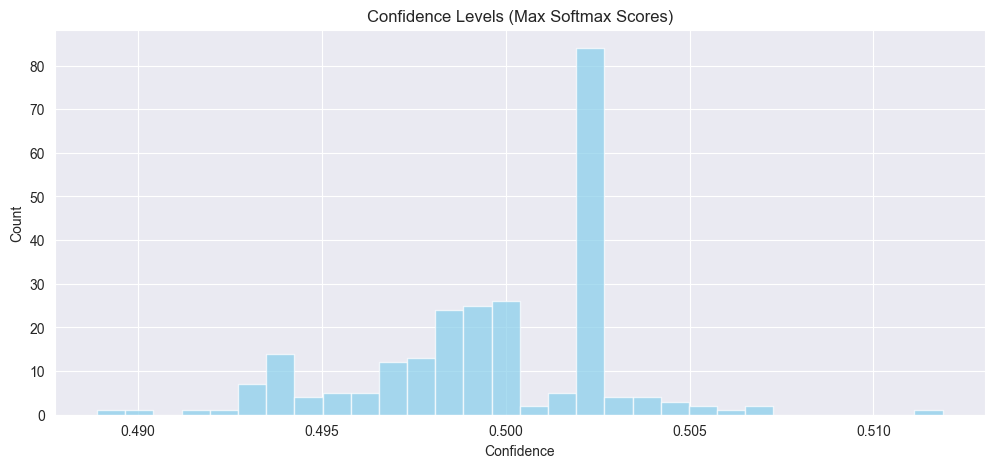

In [81]:
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compare predictions with actual values
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Down', 'neutral', 'Up']))

pred_probs = model.predict(X_test)

# Visualize probability distributions
plt.figure(figsize=(12, 5))
plt.hist(np.max(pred_probs, axis=1), bins=30, alpha=0.7, color='skyblue')
plt.title("Confidence Levels (Max Softmax Scores)")
plt.xlabel("Confidence")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Plot learning curves

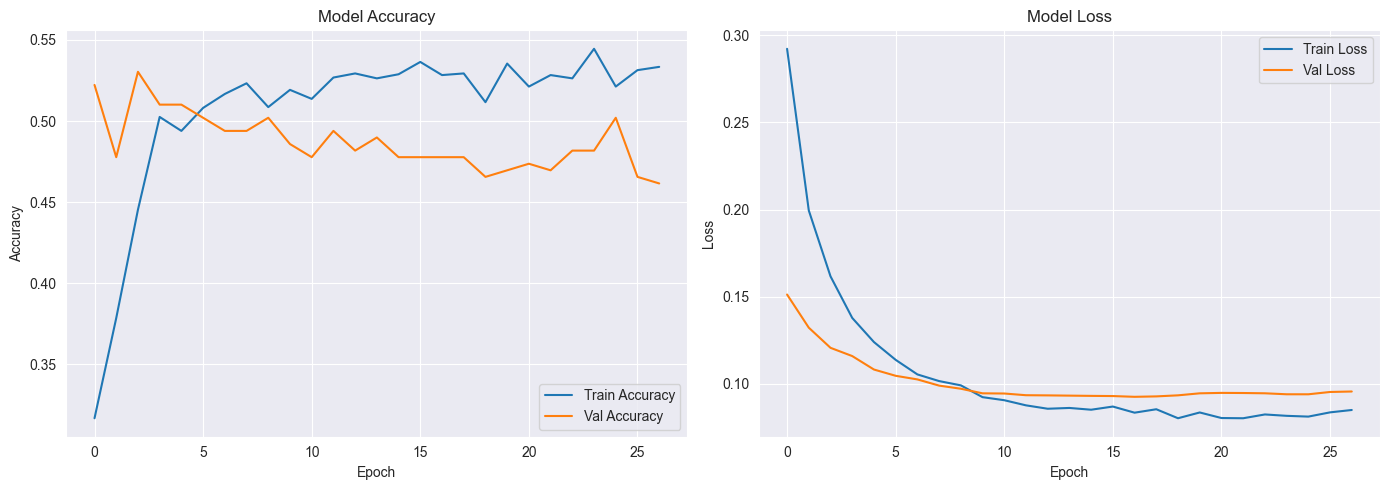

In [82]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

8/8 [==============================] - 0s 10ms/step


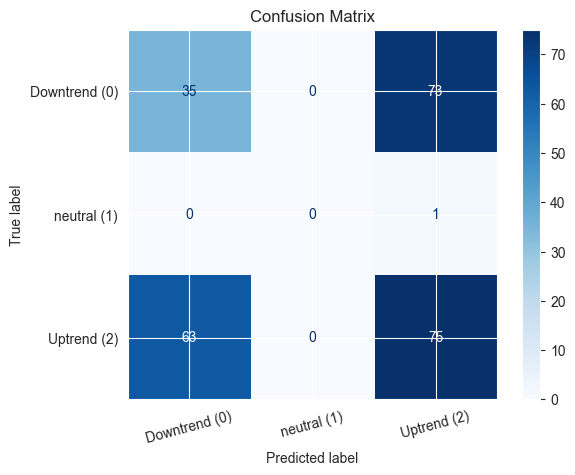

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Downtrend (0)', 'neutral (1)', 'Uptrend (2)']

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.xticks(rotation=15)
plt.show()


# ANOTHER TESTING

In [84]:
# def create_sliding_window(data, window_size):
#     X, y = [], []
#     for i in range(len(data) - window_size):
#         X.append(data[i:i + window_size, :-1])  # Include all features except the target
#         y.append(data[i + window_size, -1])  # The target is the last column
#     return np.array(X), np.array(y)
#
# # Ensure normalized data is used
# data = df_normalized.drop(columns=['date']).values
#
# # Test different window sizes
# window_sizes = [5, 10, 20, 50]
# results = {}
#
# for window_size in window_sizes:
#     X, y = create_sliding_window(data, window_size)
#     split_index = int(len(X) * 0.8)
#     X_train, X_temp = X[:split_index], X[split_index:]
#     y_train, y_temp = y[:split_index], y[split_index:]
#
#     # Further split temp set into validation and test sets
#     val_split = int(len(X_temp) * 0.5)
#     X_val, X_test = X_temp[:val_split], X_temp[val_split:]
#     y_val, y_test = y_temp[:val_split], y_temp[val_split:]
#
#     # Train the model
#     model = Sequential()
#     model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))
#
#     # Middle LSTM Layer
#     model.add(LSTM(64, return_sequences=True))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))
#
#     # Final LSTM Layer
#     model.add(LSTM(32))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2))
#
#     # Dense layer
#     model.add(Dense(32, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2))
#
#     # Output layer
#     model.add(Dense(3, activation='softmax'))
#     class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
#     alpha = class_weights.tolist()
#     # alpha = [0.4, 1.0, 0.4]
#     model.compile(optimizer=Adam(),
#                   loss=focal_loss_with_class_weights(gamma=2.0, alpha=alpha),
#                   # loss="sparse_categorical_crossentropy",
#                   metrics=["accuracy"])
#     history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0, callbacks=[reduce_lr])
#
#     # Evaluate the model
#     loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
#     results[window_size] = accuracy
#
# # Print results
# print("Window Size vs Accuracy:", results)

In [85]:
# import tensorflow as tf
# print(tf.config.list_physical_devices('GPU'))

# Save model & testing

In [86]:
# from keras.models import load_model
# model.save('stock_trend_predictor.keras')
# model = load_model("keras_models/stock_trend_predictor.keras", custom_objects={'loss': focal_loss_with_class_weights(gamma=2.0, alpha=alpha)})
#
# def predict_stock_trend(stock_code: str, date: str):
#     # Convert date
#     end_ts = convert_to_unix_timestamp(date)
#     start_ts = convert_to_unix_timestamp("2020-01-01")  # or go 100 days back
#
#     # Fetch data
#     stock_url = f"https://query2.finance.yahoo.com/v8/finance/chart/{stock_code}?period1={start_ts}&period2={end_ts}&interval=1d"
#     headers = {
#         "Content-Type": "application/json",
#         "User-Agent": "Mozilla/5.0"
#     }
#     r = requests.get(stock_url, headers=headers)
#     stock_data = StockResponse.from_json(r.json()).stock_data
#
#     # for testing only, print the last date that got from the api
#     print('Last date:')
#     print(stock_data[-1].date)
#
#     df = StockResponse(stock_data).to_dataframe()
#
#     # Compute indicators
#     df = compute_and_add_indicators(stock_data, df)
#
#     # Drop non-feature columns
#     feature_df = df.drop(columns=["date", "next_day_price_move"], errors="ignore")
#
#     # Only use feature that saved on "selected_features.txt"
#     selected_features = []
#     with open("selected_features.txt", "r") as f:
#         for line in f:
#             selected_features.append(line.strip())
#     feature_df = feature_df[selected_features]
#
#     # Get last window (e.g., last 60 days)
#     window_size = X_train.shape[1]  # reuse your training window size
#     if len(feature_df) < window_size:
#         print("Not enough data to predict")
#         return
#
#     x_input = feature_df[-window_size:].values
#     x_input = x_input.reshape((1, x_input.shape[0], x_input.shape[1]))
#
#     # Ensure x_input does not contain decimal.Decimal objects by converting them to float
#     if isinstance(x_input, np.ndarray):
#         x_input = x_input.astype(float)  # Convert the entire NumPy array to float
#     else:
#         # For iterables other than NumPy arrays
#         x_input = np.array([float(value) for value in x_input])
#
#
#     # Load model
#     # model = load_model("stock_trend_predictor.h5", custom_objects={'focal_loss': focal_loss})
#
#     # Predict
#     pred = model.predict(x_input)
#     predicted_class = np.argmax(pred)
#
#     label_map = {0: "Downtrend", 1: "neutral", 2: "Uptrend"}
#     print(f"Prediction for {stock_code} on {date}: {label_map[predicted_class]}")
#     return predicted_class

In [87]:
# from datetime import datetime, timedelta
# import numpy as np
# import pandas as pd
# import requests
# import random
#
# # === MAIN LOOP ===
# total_tests = 50  # Change this to 50 if you want
# correct = 0
#
# for i in range(total_tests):
#     stock_code = random.choice(["BMRI.JK", "BBNI.JK"])
#     today = datetime.now()
#     end_date = today - timedelta(days=2)
#     start_date = end_date - timedelta(days=1000)
#
#     url = f"https://query2.finance.yahoo.com/v8/finance/chart/{stock_code}?" \
#           f"period1={int(start_date.timestamp())}&period2={int(end_date.timestamp())}&interval=1d"
#     headers = {
#         "Content-Type": "application/json",
#         "User-Agent": "Mozilla/5.0"
#     }
#
#     r = requests.get(url, headers=headers)
#     stock_data = StockResponse.from_json(r.json())
#     df = stock_data.to_dataframe().dropna().reset_index(drop=True)
#
#     if len(df) < 62:
#         continue  # Not enough data to predict
#
#     random_index = random.randint(60, len(df) - 2)
#     last_date = df.loc[random_index - 1, "date"]
#     actual_date = df.loc[random_index, "date"]
#     close_last_date = df.loc[random_index - 1, "close"]
#     close_actual = df.loc[random_index, "close"]
#     price_change = close_actual - close_last_date
#
#     if price_change > 0.5:
#         actual_class = 2  # Uptrend
#     elif price_change < -0.5:
#         actual_class = 0  # Downtrend
#     else:
#         actual_class = 1  # neutral
#
#     # Predict using your model
#     predicted_class = predict_stock_trend(stock_code, actual_date.strftime("%Y-%m-%d"))
#
#     label_map = {0: "Downtrend", 1: "neutral", 2: "Uptrend"}
#     print(f"Test #{i+1}")
#     print(f"Stock Code       : {stock_code}")
#     print(f"Last Known Date  : {last_date.strftime('%Y-%m-%d')}")
#     print(f"Prediction Date  : {actual_date.strftime('%Y-%m-%d')}")
#     print(f"Close Last Date  : {close_last_date:.2f}")
#     print(f"Close Actual     : {close_actual:.2f}")
#     print(f"Actual Movement  : {label_map[actual_class]}")
#     print(f"Predicted        : {label_map[predicted_class]}")
#     print(f"{'✅ Correct' if predicted_class == actual_class else '❌ Incorrect'}")
#     print("-" * 50)
#
#     if predicted_class == actual_class:
#         correct += 1
#
# print(f"\n✅ Prediction Accuracy over {total_tests} tests: {correct / total_tests:.2%}")
